# Introduction to Computer Vision (ECSE 415)
# Assignment 1: Image Filtering
### Question 1.1: Denoising
### Author: Antonios Valkanas

In [1]:
# Import the necessary libraries
import numpy as np
import cv2, math
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr

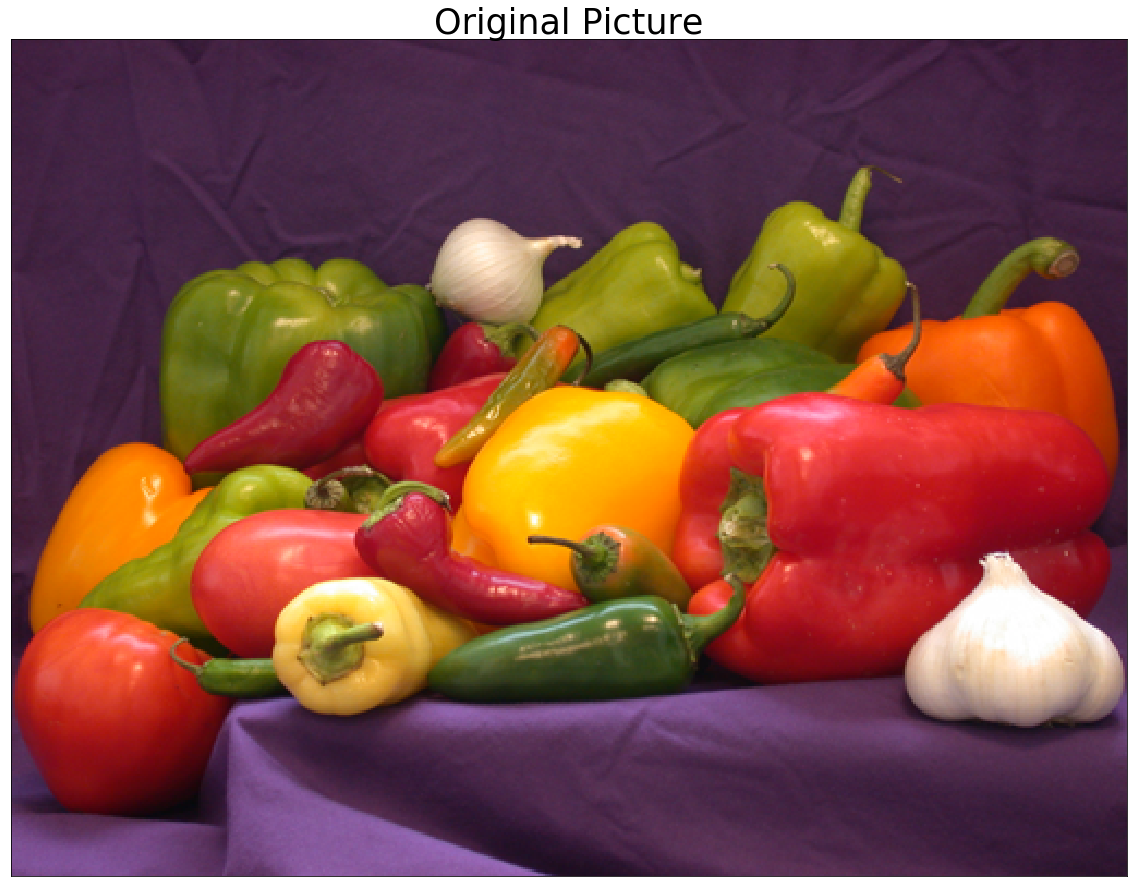

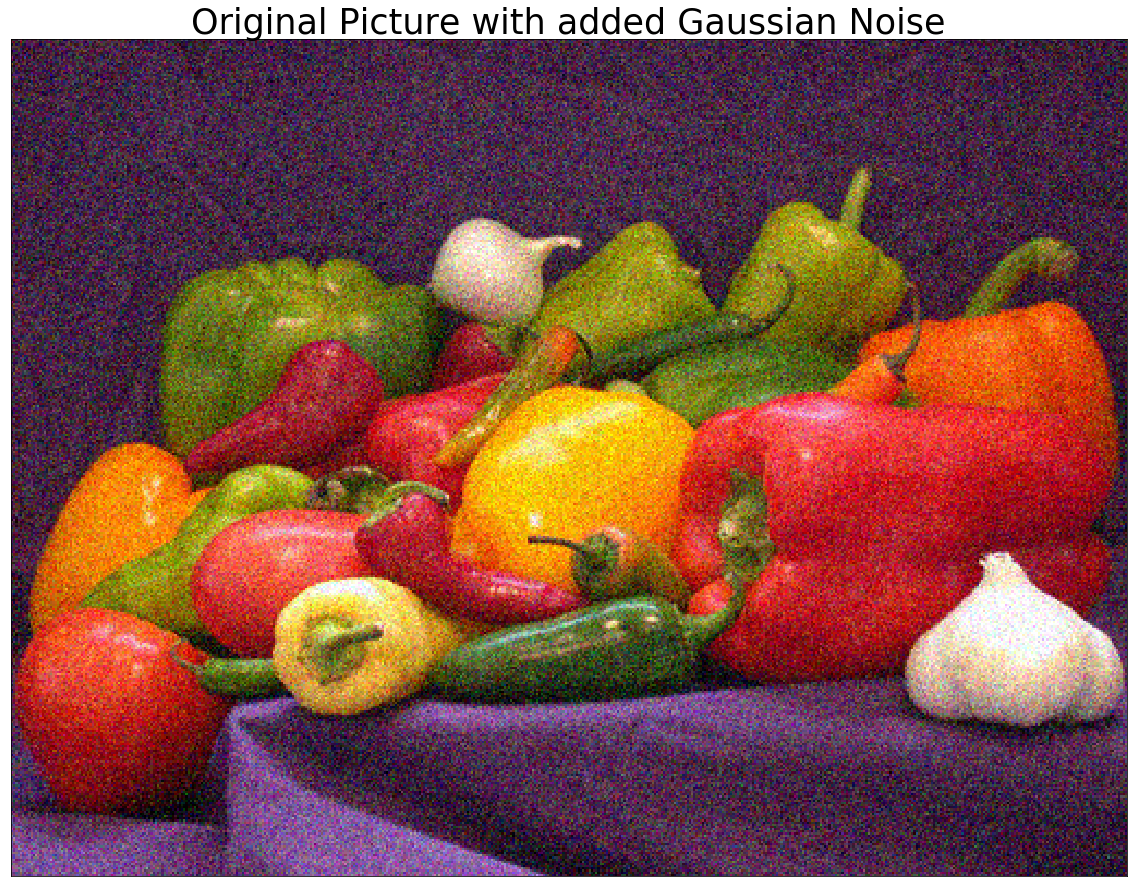

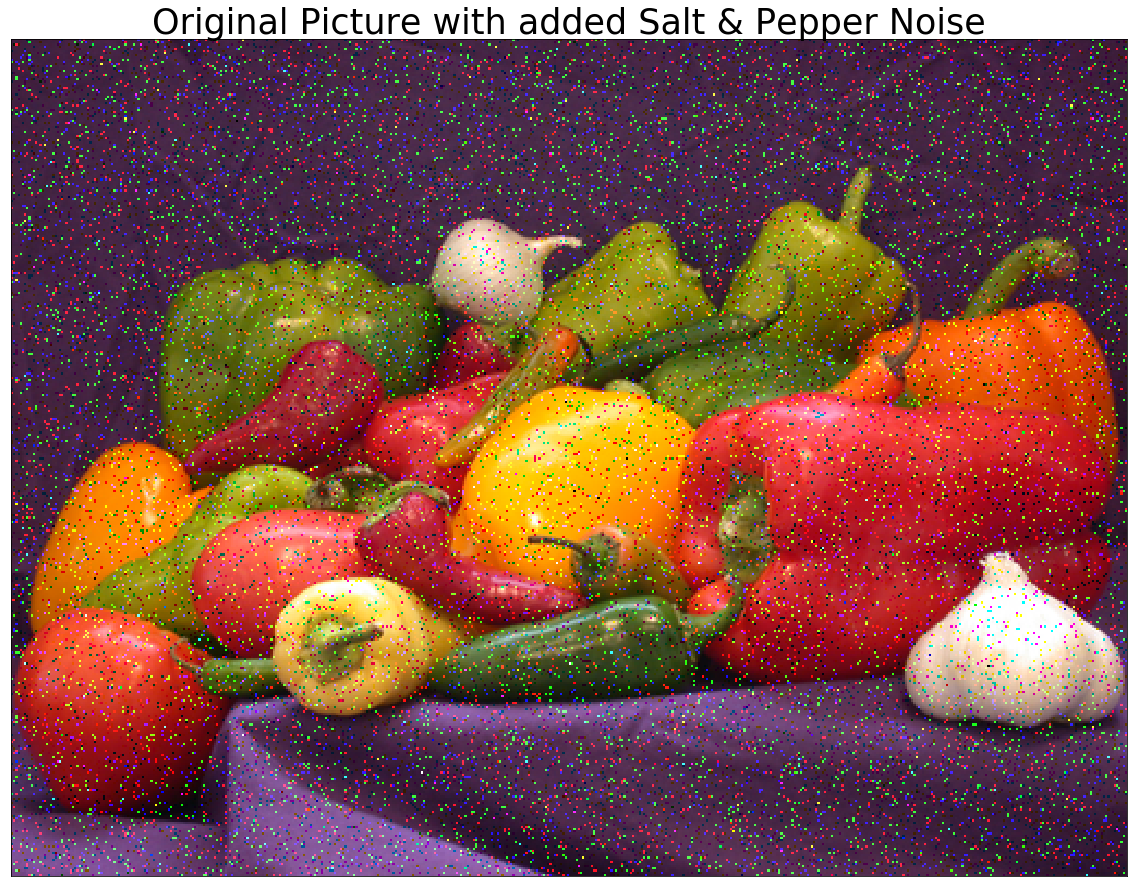

In [2]:
# Read in the image
# Load input images
original_pic = cv2.imread('peppers.png')
original_pic = cv2.cvtColor(original_pic, cv2.COLOR_BGR2RGB)


gaussian_noise_pic = cv2.imread('gaussian_noise_peppers.png')
gaussian_noise_pic = cv2.cvtColor(gaussian_noise_pic, cv2.COLOR_BGR2RGB)

salt_pepper_noise_pic = cv2.imread('saltandpepper_noise_peppers.png')
salt_pepper_noise_pic = cv2.cvtColor(salt_pepper_noise_pic, cv2.COLOR_BGR2RGB)

# Visualize each of the three images. Function used to prevent code repetition.
def plot_image(image, title_string):
    plt.figure(figsize = (20, 20))
    plt.imshow(image)
    plt.xticks([]) # removes x axis number scale
    plt.yticks([]) # removes y axis number scale
    plt.title(title_string, fontsize = 35)

plot_image(original_pic,'Original Picture')
plot_image(gaussian_noise_pic,'Original Picture with added Gaussian Noise')
plot_image(salt_pepper_noise_pic,'Original Picture with added Salt & Pepper Noise')

### 1.1.1 Filter the noisy image using a 7 x 7 Gaussian flter with variance equals to 2.

Text(0.5,1,'Filtered Picture with added Gaussian Noise')

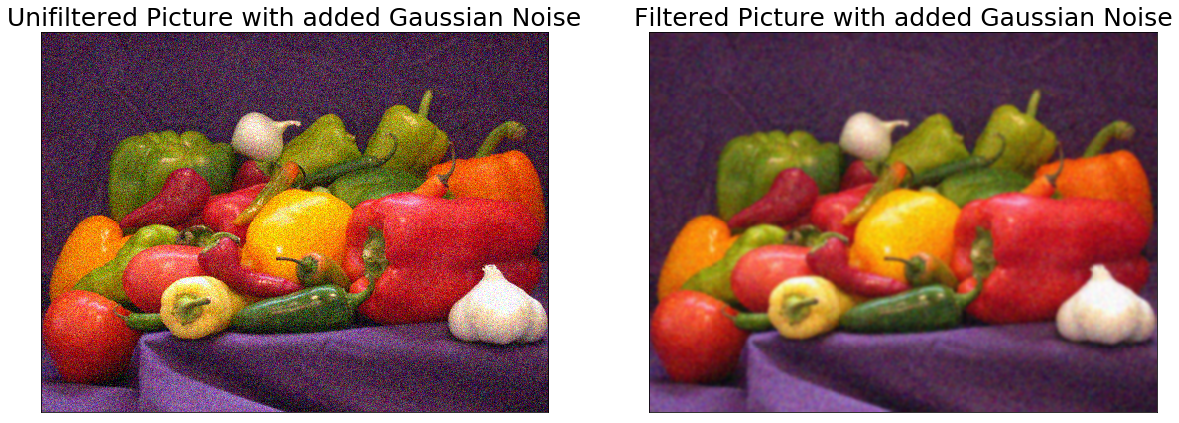

In [3]:
# Apply a Gaussian filter to the Gaussian-noise affected picture.
# The filter used has dimensions 7x7 and variance is equal to 2.
gaussian_filtered_gaussian_noise_pic = cv2.GaussianBlur(gaussian_noise_pic, (7,7), math.sqrt(2))

# Now plot the images to see the difference.
plt.figure(figsize = (20, 20))
plt.subplot(121)
plt.imshow(gaussian_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Unifiltered Picture with added Gaussian Noise', fontsize = 25)
plt.subplot(122)
plt.imshow(gaussian_filtered_gaussian_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Filtered Picture with added Gaussian Noise', fontsize = 25)

### 1.1.2 Filter the noisy image using a box filter of the same size.

Text(0.5,1,'Filtered Picture with added Gaussian Noise')

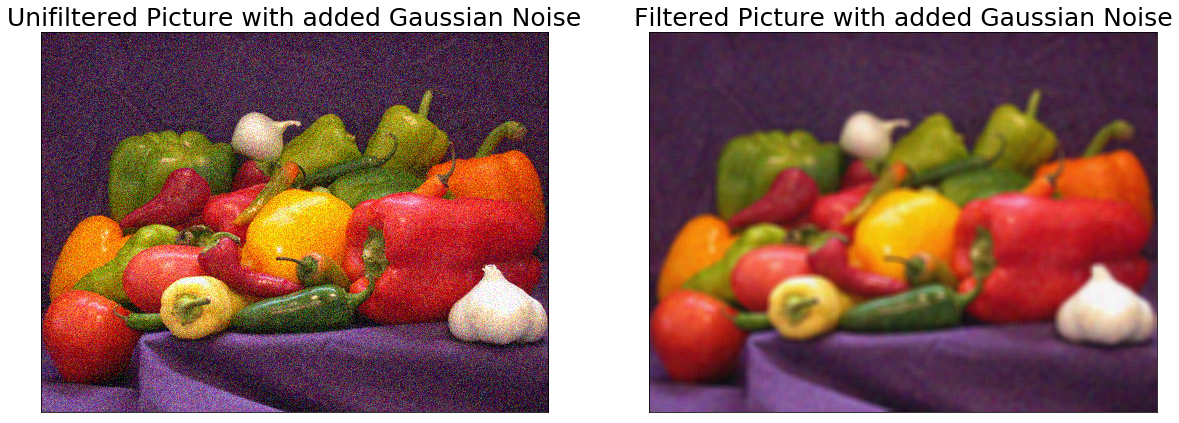

In [4]:
# Apply a box filter to the salt and pepper noise affected picture.
# The filter used has the same dimension as the previous part.
kernel = np.ones((7,7), dtype = np.float32)
kernel /= 49
box_filtered_gaussian_noise_pic = cv2.filter2D(gaussian_noise_pic, -1, kernel)

# Now plot the images to see the difference.
plt.figure(figsize = (20, 20))
plt.subplot(121)
plt.imshow(gaussian_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Unifiltered Picture with added Gaussian Noise', fontsize = 25)
plt.subplot(122)
plt.imshow(box_filtered_gaussian_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Filtered Picture with added Gaussian Noise', fontsize = 25)

### 1.1.3 Compare the PSNR of both of the denoised images to that of the clean image and state which method gives the superior result.

In [5]:
# Get the two PSNR values and then compare them
gaussian_psnr = compare_psnr(original_pic, gaussian_filtered_gaussian_noise_pic)
box_psnr = compare_psnr(original_pic, box_filtered_gaussian_noise_pic)
print('Gaussian filter PSNR is:', gaussian_psnr)
print('Box filter PSNR is:', box_psnr)

Gaussian filter PSNR is: 29.87927167099926
Box filter PSNR is: 28.278396476904042


#### Comment on Result:
As we can see the best filter in this case is the gaussian filter. This is true because the resulting filtered image for this filter has a higher peak signal to noise ratio (PSNR) compared to the box filtered image. This result makes intuitive sense since the noise added to the system was gaussian, which therefore meant that using some sort of gaussian filter would be a very effective method of reducing noise since the structure of the filter would be more closely related to the structure of the nosie. The result cannot easily be verified visually from the generated image outputs shown above because the difference in PSNRs is not sufficiently large to make the difference in filter quality obvious to the naked eye. This implies that the box filter is a worse but not by a lot. 

### 1.1.4 Filter the noisy image using the same Gaussian filter as used in the previous question.

Text(0.5,1,'Filtered Picture with added Gaussian Noise')

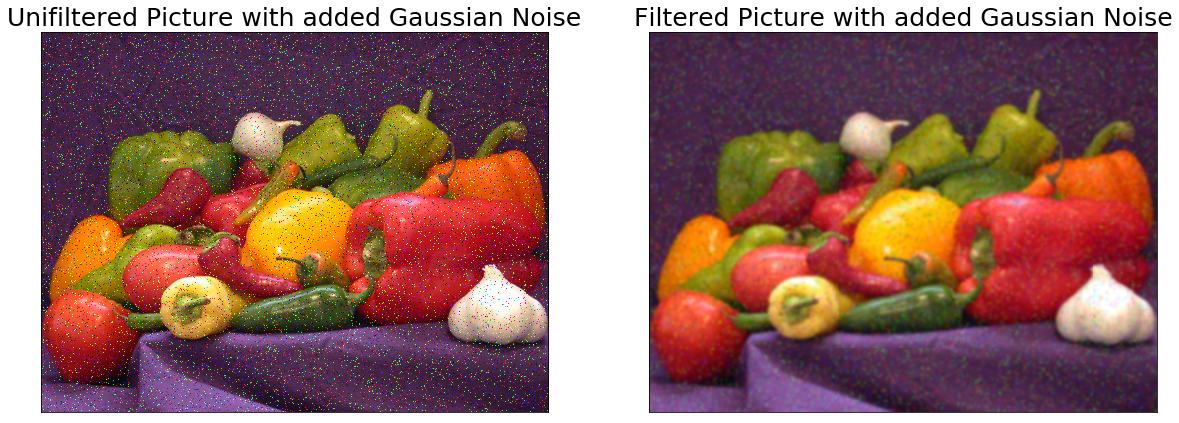

In [6]:
# Apply a Gaussian filter to the Gaussian-noise affected picture.
# The filter used has dimensions 7x7 and variance is equal to 2.
gaussian_filtered_sp_noise_pic = cv2.GaussianBlur(salt_pepper_noise_pic, (7,7), math.sqrt(2))

# Now plot the images to see the difference.
plt.figure(figsize = (20, 20))
plt.subplot(121)
plt.imshow(salt_pepper_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Unifiltered Picture with added Gaussian Noise', fontsize = 25)
plt.subplot(122)
plt.imshow(gaussian_filtered_sp_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Filtered Picture with added Gaussian Noise', fontsize = 25)

### 1.1.5 Filter the noisy image using a median filter of the same size.

Text(0.5,1,'Filtered Picture with added Gaussian Noise')

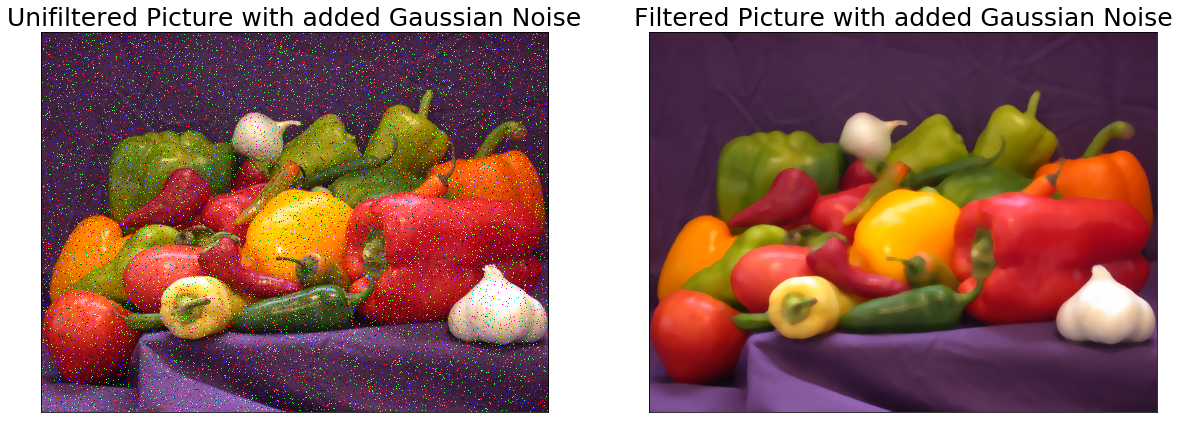

In [8]:
# Apply a box filter to the salt and pepper noise affected picture.
# The filter used has the same dimension as the previous part.
median_filtered_sp_noise_pic = cv2.medianBlur(salt_pepper_noise_pic, 7)
# Now plot the images to see the difference.
plt.figure(figsize = (20, 20))
plt.subplot(121)
plt.imshow(salt_pepper_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Unifiltered Picture with added Gaussian Noise', fontsize = 25)
plt.subplot(122)
plt.imshow(median_filtered_sp_noise_pic)
plt.xticks([]) # removes x axis number scale
plt.yticks([]) # removes y axis number scale
plt.title('Filtered Picture with added Gaussian Noise', fontsize = 25)

### 1.1.6 Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.

In [10]:
# Get the two PSNR values and then compare them
gaussian_psnr = compare_psnr(original_pic, gaussian_filtered_sp_noise_pic)
box_psnr = compare_psnr(original_pic, median_filtered_sp_noise_pic)
print('Gaussian filter PSNR is:', gaussian_psnr)
print('Median filter PSNR is:', box_psnr)

Gaussian filter PSNR is: 28.1671611567447
Median filter PSNR is: 31.871009920638333


#### Comment on Result:
As we can see the best filter in this case is the median filter. This is true because the resulting filtered image for this filter has a higher peak signal to noise ratio (PSNR) compared to the gaussian filtered image. This result makes intuitive sense since the noise added to the system was highly localized around a few pixels; which therefore meant that using some sort of local average or better yet a median filter around the noisy areas would be a very effective method of reducing noise. The result can easily be verified visually from the generated image outputs shown above because the difference in PSNRs is sufficiently large to make the difference in filter quality obvious to the naked eye. This implies that the gaussian filter is a worse by quite a bit in this case.